### Introduction and Definition of a Problem
This dataset involves a study conducted on patients in Singapore, focusing on their antibody responses to a panel of 214 different immunoreactive antigens. These responses have been measured and recorded, forming the basis of our dataset. The patients in the study are classified into two categories: those who tested positive for melioidosis (87 patients) and those who tested negative for melioidosis (59 patients).

Each of the 214 immunoreactive antigens is considered a feature within our dataset. For every patient, there's a set of 214 feature values that represent the person's unique antibody response to each of these antigens. This data can be visualized as a table, where each row corresponds to a patient and each column to an immunoreactive antigen.

The task, as a machine learning problem, is to create a model that can accurately predict whether a new patient (not part of the original 146 patients) is likely to test positive or negative for melioidosis based on their antibody responses to these 214 antigens. This is essentially a binary classification problem, where the two classes are "melioidosis positive" and "melioidosis negative".

A successful machine learning model for this task could be an important tool for medical professionals, aiding in the diagnosis of melioidosis. Such a model would take as input the antibody responses to the 214 antigens for a given patient and output a prediction of whether the patient is positive or negative for melioidosis. The goal is to train this model using our current dataset, so that it can make accurate predictions for future, unseen patients.
The Algorithm used for classification in this analysis is Bayes Classifier Based on Density Estimation.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('./data.csv',sep=';')
data.shape

(146, 215)

In [29]:
data.head()

,BPSS1512,BPSL2520,BPSL2522,BPSS1525,BPSS1516,BPSL2096,BPSS1722,BPSS2141,BPSL2698,BPSS0476,...,BPSS1998,BPSS2277,BPSL0606,BPSS0226,BPSS1401,BPSL0361,BPSS0796.2,BPSS1382,BPSS0412,Target
0,0,0.00,0.00,0.00,0,0.00,0,333.50,0.0,0.00,...,0.00,0,0.0,0.0,0.00,0.0,0,0.0,0.00,0
1,Oct.33,162.33,132.33,50.33,64.33,0.00,135.33,682.33,0.0,13.33,...,146.33,59.33,0.0,0.0,0.00,0.0,0,0.0,60.33,0
2,0,0.00,2173.33,0.00,0,0.00,0,0.00,0.0,0.00,...,0.00,0,0.0,0.0,0.00,0.0,0,0.0,0.00,0
3,0,534.83,474.83,0.00,0,336.83,0,673.83,0.0,0.00,...,0.00,0,0.0,0.0,126.83,0.0,0,0.0,0.00,0
4,5558.33,422.33,156.33,0.00,0,0.00,108.33,0.00,0.0,386.33,...,0.00,0,0.0,0.0,0.00,0.0,0,0.0,0.00,0


### Replace all non-numeric values to 0

In [30]:
for col in data.columns:
    data[col] = (
    pd.to_numeric(data[col],
                  errors='coerce')
      .fillna(0)
    )
data

,BPSS1512,BPSL2520,BPSL2522,BPSS1525,BPSS1516,BPSL2096,BPSS1722,BPSS2141,BPSL2698,BPSS0476,...,BPSS1998,BPSS2277,BPSL0606,BPSS0226,BPSS1401,BPSL0361,BPSS0796.2,BPSS1382,BPSS0412,Target
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,333.50,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0
1,0.00,162.33,132.33,50.33,64.33,0.00,135.33,682.33,0.00,13.33,...,146.33,59.33,0.00,0.0,0.00,0.0,0.0,0.0,60.33,0
2,0.00,0.00,2173.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0
3,0.00,534.83,474.83,0.00,0.00,336.83,0.00,673.83,0.00,0.00,...,0.00,0.00,0.00,0.0,126.83,0.0,0.0,0.0,0.00,0
4,5558.33,422.33,156.33,0.00,0.00,0.00,108.33,0.00,0.00,386.33,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5944.33,5807.33,293.33,0.00,9075.33,0.00,1061.33,0.00,0.00,914.33,...,0.00,0.00,119.33,0.0,0.00,0.0,0.0,0.0,0.00,1
142,347.50,931.50,301.50,253.50,16897.50,0.00,442.50,0.00,8538.50,6528.50,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1
143,2978.50,4600.50,0.00,0.00,3939.50,0.00,8445.50,1366.50,1472.50,557.50,...,0.00,2117.50,0.00,18714.5,5819.50,3292.5,7271.5,14358.5,0.00,1
144,0.00,272.83,787.83,0.00,0.00,0.00,269.83,0.00,18219.83,18743.83,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,1


## Since now we have the data in the right format, we can start with the analysis

First, we prepared training data for both 'infected' and 'noninfected' cases. We used a tool called a kernel density estimator with a Gaussian kernel - this essentially lets us create a model of how the data in each category behaves.

Next, we made an educated guess, called a "prior", about how likely each category is, just based on how many 'infected' and 'noninfected' cases there are in our training data.

When we get new data (we'll call it 'x'), we use our models to estimate how likely 'x' is to belong to each category. This is done using a concept from probability theory called Bayes’ theorem. Here, we consider two factors: our prior guess about how likely each category is, and how typical 'x' is for each category according to our models.

We decided to simplify things a bit - just like in a method called Naïve Bayes classifier, we dropped a part of the equation that doesn't change between categories.

Finally, we put our new data 'x' in the category that seems most probable based on the above. The category with the highest calculated likelihood gets to claim 'x' as one of its own. This way, we have a system for classifying new data points as either 'infected' or 'noninfected'.

### Classification model without using the StandardScaler (without standardization of a data)

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix, accuracy_score

# separate data into infected and noninfected
infected = data[data['Target'] == 1]
noninfected = data[data['Target'] == 0]

# Train-Test Split
train_infected, test_infected = train_test_split(infected.drop('Target',axis=1), test_size=0.2, random_state=42)
train_noninfected, test_noninfected = train_test_split(noninfected.drop('Target',axis=1), test_size=0.2, random_state=42)


# calculate the priors
total_train_samples = len(train_infected) + len(train_noninfected)
prior_infected = len(train_infected) / total_train_samples
prior_noninfected = len(train_noninfected) / total_train_samples

# Fit the training data so that we can compute density function for each new input
kde_infected = KernelDensity(kernel='gaussian',bandwidth=200.0).fit(train_infected)
kde_noninfected = KernelDensity(kernel='gaussian',bandwidth=200.0).fit(train_noninfected)

def compute_posterior(x):
    log_prior_infected = np.log(prior_infected) + kde_infected.score_samples([x])
    log_prior_noninfected = np.log(prior_noninfected) + kde_noninfected.score_samples([x])
    return 1 if log_prior_infected > log_prior_noninfected else 0

# concatinate to get all test data for both sets
X_test = pd.concat([test_infected, test_noninfected])

# Create array of true infected and noninfected values
y_test = np.concatenate((np.ones(len(test_infected)), np.zeros(len(test_noninfected))))

predictions = X_test.apply(compute_posterior, axis=1)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = accuracy_score(y_test, predictions)

print(f"True Positive: {tp}, False Positive: {fp}, True Negative: {tn}, False Negative: {fn}")
print(f"Accuracy: {accuracy}")


True Positive: 9, False Positive: 4, True Negative: 14, False Negative: 3
Accuracy: 0.7666666666666667


/Users/diellor/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/diellor/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/diellor/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/diellor/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/diellor/Library/Python/3.10/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/diellor/Libra

### Experiment using StarndarScaler

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

infected = data[data['Target'] == 1]
noninfected = data[data['Target'] == 0]

train_infected, test_infected = train_test_split(infected.drop('Target',axis=1), test_size=0.2, random_state=42)
train_noninfected, test_noninfected = train_test_split(noninfected.drop('Target',axis=1), test_size=0.2, random_state=42)

# Use a separate scaler for infected and noninfected sets
scaler_infected = StandardScaler().fit(train_infected)
scaler_noninfected = StandardScaler().fit(train_noninfected)

train_infected_norm = scaler_infected.transform(train_infected)
train_noninfected_norm = scaler_noninfected.transform(train_noninfected)

kde_infected = KernelDensity(kernel='gaussian').fit(train_infected_norm)
kde_noninfected = KernelDensity(kernel='gaussian').fit(train_noninfected_norm)

total_train_samples = len(train_infected_norm) + len(train_noninfected_norm)
prior_infected = len(train_infected_norm) / total_train_samples
prior_noninfected = len(train_noninfected_norm) / total_train_samples

def compute_posterior(x):
    log_prior_infected = np.log(prior_infected) + kde_infected.score_samples([x])
    log_prior_noninfected = np.log(prior_noninfected) + kde_noninfected.score_samples([x])
    return 1 if log_prior_infected > log_prior_noninfected else 0


x_test_infected = scaler_infected.transform(test_infected)
x_test_noninfected = scaler_noninfected.transform(test_noninfected)

x_test_infected_df = pd.DataFrame(x_test_infected, columns=test_infected.columns)
x_test_noninfected_df = pd.DataFrame(x_test_noninfected, columns=test_noninfected.columns)

X_test = pd.concat([x_test_infected_df, x_test_noninfected_df])

y_test = np.concatenate((np.ones(len(test_infected)), np.zeros(len(test_noninfected))))

predictions = []
for x in X_test.values:
    predictions.append(compute_posterior(x))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = accuracy_score(y_test, predictions)

print(f"True Positive: {tp}, False Positive: {fp}, True Negative: {tn}, False Negative: {fn}")
print(f"Accuracy: {accuracy}")

True Positive: 11, False Positive: 9, True Negative: 9, False Negative: 1
Accuracy: 0.6666666666666666


### Use GridSearchCV for hyperparameter tuning (this can help us with the accuracy of our model)

Best Bandwith for train_infected
1.0718913192051276
Best Bandwith for train_not_infected
0.9771241535346497
True Positive: 8, False Positive: 4, True Negative: 14, False Negative: 4
Accuracy: 0.7333333333333333


<module 'matplotlib.pyplot' from '/Users/diellor/Library/Python/3.10/lib/python/site-packages/matplotlib/pyplot.py'>

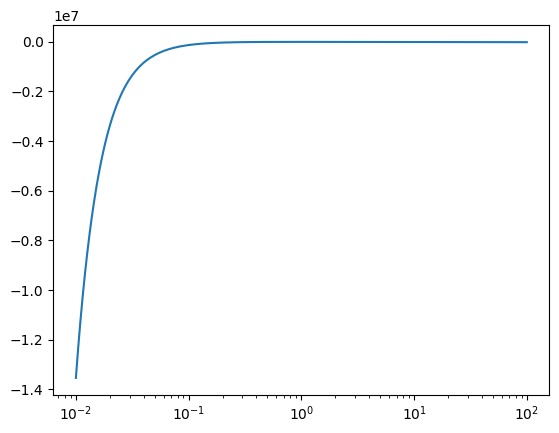

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

infected = data[data['Target'] == 1]
noninfected = data[data['Target'] == 0]

# Split the data
train_infected, test_infected = train_test_split(infected.drop('Target',axis=1), test_size=0.2, random_state=42)
train_noninfected, test_noninfected = train_test_split(noninfected.drop('Target',axis=1), test_size=0.2, random_state=42)

scaler_infected = StandardScaler().fit(train_infected)
scaler_noninfected = StandardScaler().fit(train_noninfected)

train_infected_norm = scaler_infected.transform(train_infected)
train_noninfected_norm = scaler_noninfected.transform(train_noninfected)

total_train_samples = len(train_infected) + len(train_noninfected)
prior_infected = len(train_infected) / total_train_samples
prior_noninfected = len(train_noninfected) / total_train_samples

kde = KernelDensity(kernel='gaussian')

param_grid = {'bandwidth': 10**np.linspace(-2,2,200)}

grid = GridSearchCV(kde, param_grid=param_grid, cv=5)

grid.fit(train_infected_norm)

best_bandwidth = grid.best_params_['bandwidth']
print("Best Bandwith for train_infected")
print(best_bandwidth)

kde_infected = KernelDensity(kernel='gaussian', bandwidth=best_bandwidth).fit(train_infected_norm)

kde = KernelDensity(kernel='gaussian')

param_grid = {'bandwidth': 10**np.linspace(-2,2,200)}

grid = GridSearchCV(kde, param_grid=param_grid, cv=5)

grid.fit(train_noninfected_norm)

best_bandwidth = grid.best_params_['bandwidth']
print("Best Bandwith for train_not_infected")
print(best_bandwidth)

kde_noninfected = KernelDensity(kernel='gaussian', bandwidth=best_bandwidth).fit(train_noninfected_norm)

def compute_posterior(x):
    log_prior_infected = np.log(prior_infected) + kde_infected.score_samples([x])
    log_prior_noninfected = np.log(prior_noninfected) + kde_noninfected.score_samples([x])
    return 1 if log_prior_infected > log_prior_noninfected else 0

x_test_infected = scaler_infected.transform(test_infected)
x_test_noninfected = scaler_noninfected.transform(test_noninfected)

x_test_infected_df = pd.DataFrame(x_test_infected, columns=test_infected.columns)
x_test_noninfected_df = pd.DataFrame(x_test_noninfected, columns=test_noninfected.columns)

X_test = pd.concat([x_test_infected_df, x_test_noninfected_df])

y_test = np.concatenate((np.ones(len(test_infected)), np.zeros(len(test_noninfected))))

predictions = []
for x in X_test.values:
    predictions.append(compute_posterior(x))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = accuracy_score(y_test, predictions)

print(f"True Positive: {tp}, False Positive: {fp}, True Negative: {tn}, False Negative: {fn}")
print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt

scores = grid.cv_results_['mean_test_score']
plt.plot(10**np.linspace(-2,2,200), scores)
plt.xscale('log')
plt

## Summary of our analysis

#### Using Gridsearchcv to find the optimal bandwidth didn't help on reaching better accuracy. Still manually trying the best bandwidth was value 3, which gave 0.76 accuraccy with the transformed (scaled) input.
#### The first experiment without using stardardscaling performed the best with: True Positive: 9, False Positive: 4, True Negative: 14, False Negative: 3 and Accuracy: 0.76 
#### Compared to the second experiment with : True Positive: 9, False Positive: 6, True Negative: 12, False Negative: 3 and Accuracy: 0.7
#### While manually switching the bandwidth since gridsearchcv didn't help much, with using bandwidht = 3 for each kernelDensities, results were: True Positive: 10, False Positive: 5, True Negative: 13, False Negative: 2 and with Accuracy: 0.76